In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [5]:
#!pip install nltk

In [6]:
#!pip install wordcloud

In [7]:
import nltk

In [8]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")

In [9]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [10]:
#Dataset is scrapped from Amazon for Lenovo K8 mobile phones
# Review in the form of free text was scrapped and the user rating
# A user rating of 1,2,3 -> sentiment 0
# A user rating of 4 and 5 -> sentiment 1

In [11]:
reviews.shape

(14675, 2)

In [12]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [13]:
reviews.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

Getting insignts from the reviews:

        1. Use regular expressions
        2. Word cloud
        3. Bar graph

## Use regular expressions to get insignts about the reviews

### 1. Find out the Reviews Which have some numbers followed by the gb

In [14]:
count=0
for review in reviews.review.values:
    review = review.strip()
    result = re.search("\d+gb",review)
    if result:
        print(review)
        count+=1

Nice performance with 4gb RM and 64gb inbuilt memory
very bad and when lenovo and moto merged the standard of lenovo went to a worst condition. the 4gb decacore do nothing....dont buy it. very bad.....
Very nice looking phone.. Nice build quality... Awesome product ... In this price range it is a best phone... Nice bettory life and fast charging... It has all specifications ... Dual camera... Nice fingerPrint scanner... Awesome work with 4gb/64gb combination... Realy value for money...
It gets very hot while using. I was using Lenovo K4 for last one year and was more satisfied with that rather this one @ 13999. Main drawback of this phone arebeautiful_ Cast (screen mirror) doesn't work. Bluetooth is also disturbing. Touch screen is not as sensitive as it should be with 4gb ram and 64 GB internal memory with 10 core processer. Display got broken very early with in two months of use. It's very normal and not as strong as k4. Hand grip is not good. Voice clarity not good and Dolby sound i

In [15]:
print(count)

81


In [16]:
#2. Find out the Reviews Which have some numbers followed by the /-

In [17]:
count=0
for review in reviews.review.values:
    review = review.strip()
    result = re.search("\d+/-",review)
    if result:
        print(review)
        count+=1

Firstly product not delivered on time dissatisfied 2 weeks.Secondly Android 7.1.1 naugat doesn't have call recording optionThirdly when selling product cost was 13999/- now why drastically dropped. 10999/-Fourthly when talking over the phone feels like nerve pulling to much radiation need immediate fix on this matter as it's safety and security of customer.Fifthly if any issues in hardware issues please let us know the service centers location. And please ensure hardware availability should be there at any time when customers booked.Finally as discribed about product all features are ok no issues found as mentioned earlier if call recording option would have added the this product would have been met the expectations.Camera quality is good not bad snap attached.
Bad quality of screen.Mobile was just fall from 1 ft. of height & screen was brokenCustomer care of Lenovo Jabalpur (MP) is not responding regarding the replacement of screen even on paid service basis. I have deposited Rs. 420

In [18]:
print(count)

28


## Get the word cloud:

    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud on the instance

In [19]:
from wordcloud import WordCloud

In [20]:
reviews_combined = " ".join(reviews.review.values)

In [21]:
lst = ["A","B","C"]
" ".join(lst)

'A B C'

In [22]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [23]:
word_cloud = WordCloud().generate(reviews_combined)

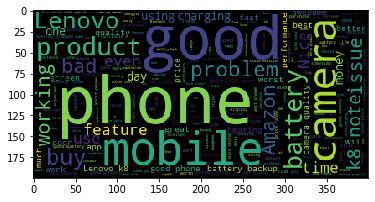

In [24]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [25]:
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(reviews_combined)

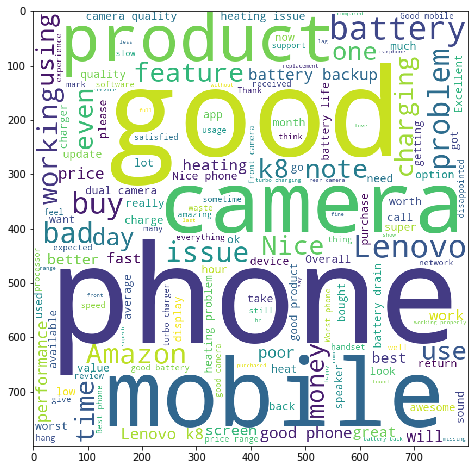

In [26]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph of top 25 used words

1. get the words and the frequencies
2. sort based on frequencies and get the top 25 words
3. plot the bar graph

In [27]:
from nltk.probability import FreqDist
all_terms = reviews_combined.split(" ")
fdist = FreqDist(all_terms)

In [28]:
fdist

FreqDist({'is': 10151, 'the': 5565, 'not': 5162, 'and': 5078, 'phone': 4766, 'to': 4627, 'this': 3833, 'in': 3445, 'I': 3418, 'good': 3348, ...})

In [29]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

In [30]:
df_dist.head()

,words,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [31]:
#Top 5 words based on frequency
df_dist.sort_values(ascending=False, by="freq").head(15)

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766
20,to,4627
75,this,3833
143,in,3445
28,I,3418
185,good,3348


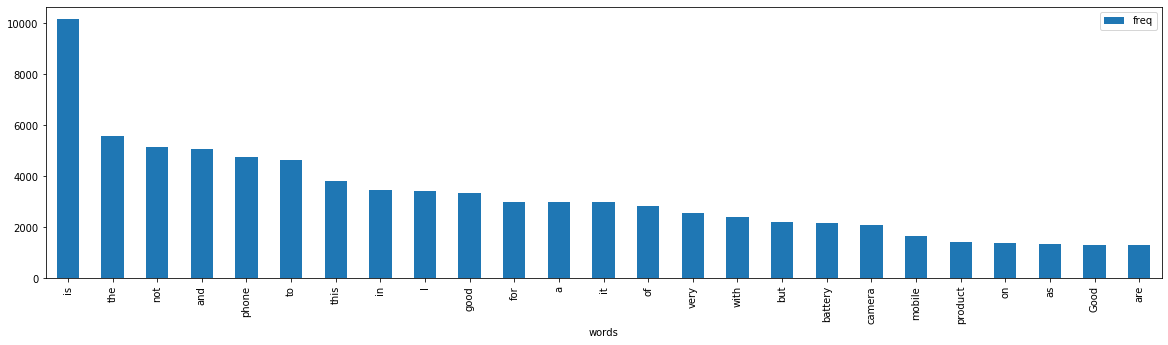

In [32]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with these visuals : Too many distinct words in the corpus of reviews
    
    1.Text is non uniform case
    2.Punctuations present in the text
    3.There are language connectors in the text - stop words
    4.Words with different forms/tenses - charge, charged, charging

## Text Cleaning

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
all_terms = word_tokenize(reviews_combined.lower())

In [35]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [36]:
len(set(all_terms))

19159

In [37]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

In [68]:
fdist.plot(30)

SyntaxError: invalid syntax (<ipython-input-68-7dccb202a07f>, line 1)

The head and the tail of the above graph consists of either punct or stop words which needs to be removed

In [69]:
reviews_combined_clean = re.sub("[^\w\s]+","",reviews_combined)
all_terms = word_tokenize(reviews_combined_clean.lower())

In [70]:
len(set(all_terms))

18818

In [1]:
from nltk.corpus import stopwords

In [72]:
stop_nltk = stopwords.words("english")

In [73]:
stop_updated = stop_nltk  + ["mobile","phone","lenovo","k8","note"]

In [74]:
all_terms1 = [term for term in all_terms if term not in stop_updated and len(term)>2]

In [75]:
len(set(all_terms1))

18297

In [76]:
print(all_terms1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'dischargedthis', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'chargeddont', 'know', 'survive', 'making', 'full', 'usplease', 'dont', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', 'highly', 'disappointing', 'amazon', 'telling', 'dont', 'buyim', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allotreally', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problemsand', 'hanging', 'problems', 'noteso', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', '

In [77]:
set(all_terms1)

{'court',
 'takjisme',
 'charege',
 'bad',
 'variantdelivery',
 '1010battery',
 'much',
 'contrasting',
 'burner',
 'half',
 'reader',
 'boooooor',
 'moneybeats',
 'reducedthe',
 'worstbekar',
 'disadvantage',
 'displayif',
 'install',
 'goodworking',
 'radiation',
 'object',
 'workingonly',
 'powercall',
 'camerastock',
 'disasterdrains',
 'mobilesdual',
 'understatement',
 'ekdm',
 'earphonesthere',
 'received42958',
 'qualityno',
 'experiencephone',
 'customersthanks',
 'worstphone',
 'feedback',
 '1bokeh',
 'bis',
 'speakers3',
 'voice3',
 'patience',
 'chargingor',
 'consumingfinally',
 'chat',
 'starsthe',
 '5and',
 'punda',
 'karay',
 'til',
 'worth2',
 'weast',
 'ridiculous',
 'upif',
 'lags4no',
 'goodheating',
 'yourself2',
 'details1',
 'bugsboot',
 'trough',
 'serieseven',
 'hng',
 'shandaar',
 'betterand',
 'terribleit',
 'issue5',
 'experiencedont',
 'extract',
 'saying',
 '5000mah',
 'tops',
 'fing',
 'protruding',
 '15watt',
 'whatsappfb',
 'payment',
 'appdual',
 'tome

In [78]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [79]:
all_terms1_stemmed = [ stemmer_s.stem(word) for word in all_terms1]

In [80]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [81]:
all_terms1_lemm = [ lemm.lemmatize(word,pos='v') for word in all_terms1]

In [82]:
print(len(set(all_terms1_stemmed)),len(set(all_terms1_lemm)))

15939 16877


Since stemmer reduces the total number of distinct words in the corpus, we will be using stemming for frequency based analysis

lets build a udf

- input : review 
- Tasks : All the above cleaning steps
- Return : string of cleaned reveiw

based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [83]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]","",result)
    #Normalize case, stemm and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    #Join all to form a single string which will be returned from the UDF       
    res = " ".join(stemmed)
    return res  

In [84]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [85]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...




# Word cloud on cleaned dataset

In [86]:
reviews_combined_clean = " ".join(reviews.clean_review.values)

In [87]:
reviews_combined_clean[:500]

'good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get dischargedthi biggest lie amazon lenov expect make full say batteri 4000mah booster charger fake take least hour fulli chargeddont know surviv make full uspleas dont els regret like get cash back alreadi januari good worst everthey chang last problem still amazon return high disappoint amazon tell dont buyim total disappointedpoor batterypoor camerawast money awesom charg heat allotr genuin'

In [88]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined_clean)

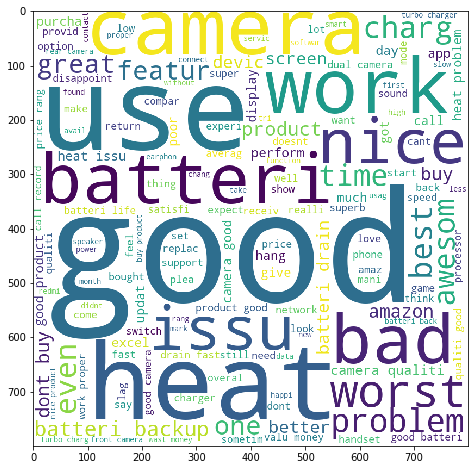

In [89]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [90]:
from nltk.probability import FreqDist
all_terms = word_tokenize(reviews_combined_clean)
fdist = FreqDist(all_terms)

In [91]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

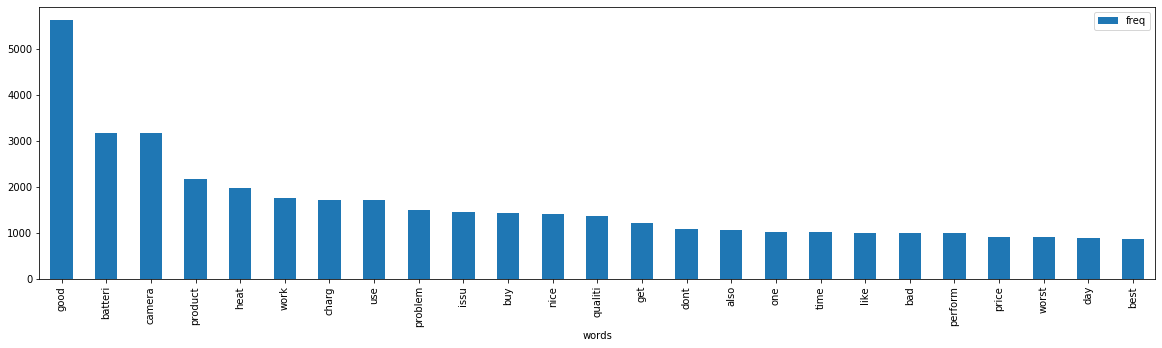

In [92]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)

In [95]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [96]:
DTM_bigram.head(20)

,4000 mah,4gb ram,also good,back camera,backup good,bad experi,bad product,batteri back,batteri backup,batteri charg,...,want return,wast money,work fine,work good,work proper,work well,worst ever,worst product,worth buy,worth money
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
bigram_count_vectorizer.get_feature_names()[:20]

['4000 mah',
 '4gb ram',
 'also good',
 'back camera',
 'backup good',
 'bad experi',
 'bad product',
 'batteri back',
 'batteri backup',
 'batteri charg',
 'batteri drain',
 'batteri get',
 'batteri good',
 'batteri heat',
 'batteri last',
 'batteri life',
 'batteri perform',
 'batteri problem',
 'best price',
 'build qualiti']

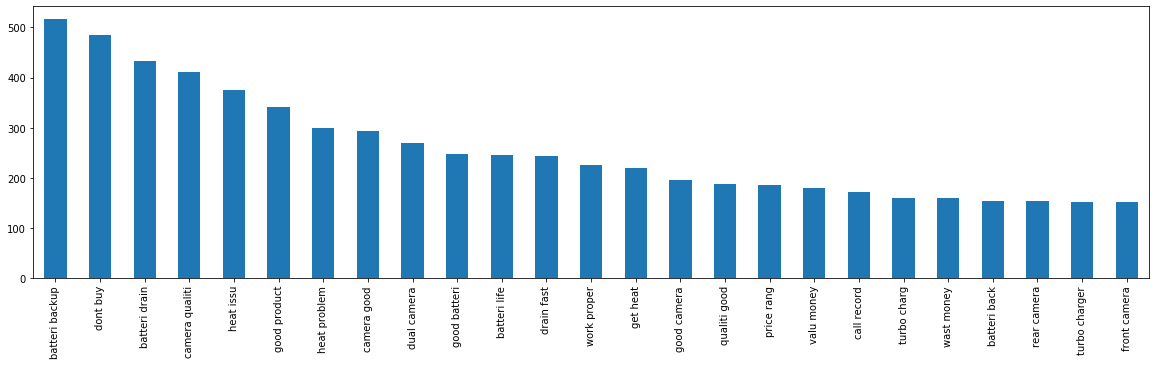

In [98]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words

 - "battery drain"
 - "Good camera"

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
# create a bigram count vectorizer object
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))

In [68]:
X_bigram = bigram_tfidf_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), 
                          columns=bigram_tfidf_vectorizer.get_feature_names())

In [69]:
DTM_bigram['batteri drain'].sort_values(ascending=False).head(5)

112     0.666739
6404    0.666739
2964    0.666739
6486    0.666739
3130    0.666739
Name: batteri drain, dtype: float64

In [70]:
DTM_bigram['good camera'].sort_values(ascending=False).head(5)

13420    1.000000
3127     0.758060
1439     0.758060
10047    0.733711
12419    0.733711
Name: good camera, dtype: float64

### Sentiment Prediction Strategy 1: Building our own model based on the Sentiment labels

Applying Supervised learning on labelled text data -  In this case we will leverage the sentiment label which is available along with the text data

Steps
- Step1: Seperate out the X and y
- Step2: converting text to numbers (countvectorizer or tfidfvectorizer)
- Step3: Split into test and train
- Step4: train the model
- Step5: test and get the accuracy scores
- Step6: Make predictions for an Input Review

In [71]:
X_text = reviews.clean_review.values
y = reviews.sentiment.values

In [72]:
count_vect = CountVectorizer(max_features=3500)
X = count_vect.fit_transform(X_text)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = logreg.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
accuracy_score(y_test,y_pred)

0.8453151618398637

In [79]:
#Make Predictions:
review1 = "This is a fantastic mobile really like it but the battery drains fast"
review2 = "Camera is good but when I speak over phone continuously over long time it gets\
heated up"

In [80]:
review = [review1,review2]

In [81]:
c_review = list(map(clean_txt, review))

In [82]:
X_test_new = count_vect.transform(c_review)

In [83]:
y_test_pred_new = logreg.predict(X_test_new)

In [84]:
y_test_pred_new

array([1, 1], dtype=int64)

In [85]:
from sklearn.naive_bayes import MultinomialNB

In [86]:
nb = MultinomialNB()

In [87]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
y_test_pred = nb.predict(X_test)

In [89]:
accuracy_score(y_test, y_test_pred)

0.8429301533219762

In [90]:
y_test_pred_new = nb.predict(X_test_new)

In [91]:
y_test_pred_new

array([1, 1], dtype=int64)

# Sentiment Classification

### Sentiment Prediction Strategy 1: Word based scoring 

In [92]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [93]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [94]:
reviews['sent_score_afinn'] = reviews.clean_review.apply(get_sentiment)

In [95]:
reviews.head()

,sentiment,review,clean_review,sent_score_afinn
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7


In [96]:
reviews['sent_prediction_afinn'] = \
reviews.sent_score_afinn.apply(lambda x:1 if x>0 else 0)

In [97]:
reviews.head()

,sentiment,review,clean_review,sent_score_afinn,sent_prediction_afinn
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


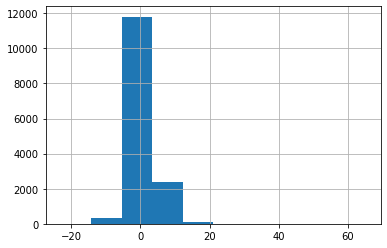

In [98]:
reviews.sent_score_afinn.hist()

In [99]:
reviews.head()

,sentiment,review,clean_review,sent_score_afinn,sent_prediction_afinn
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [101]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_afinn)

0.7103918228279387

In [102]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_afinn)

array([[5147, 2565],
       [1685, 5278]], dtype=int64)

In [103]:
def clean_txt_new(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]","",result)
    #Normalize case and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    token_new = [(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    #Join all to form a single string which will be returned from the UDF       
    res = " ".join(token_new)
    return res

In [104]:
reviews['clean_review_unstemmed'] = reviews.review.apply(clean_txt_new)

In [105]:
reviews.head()

,sentiment,review,clean_review,sent_score_afinn,sent_prediction_afinn,clean_review_unstemmed
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january
3,1,Good,good,3,1,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...


In [106]:
reviews['sent_score_afinn'] = reviews.clean_review_unstemmed.apply(get_sentiment)

In [107]:
#AFINN Prediction by setting the threshold to 0
reviews['sent_prediction_afinn'] = \
reviews.sent_score_afinn.apply(lambda x:1 if x>0 else 0)

In [108]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_afinn)

0.7465758091993185

In [109]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_afinn)

array([[4962, 2750],
       [ 969, 5994]], dtype=int64)

In [110]:
#AFINN PRediction by setting the threshold to 2
reviews['sent_prediction_afinn'] = \
reviews.sent_score_afinn.apply(lambda x:1 if x>2 else 0)
accuracy_score(reviews.sentiment,reviews.sent_prediction_afinn)

0.7772402044293015

### Sentiment Prediction Strategy 2: Using popular package - Vader

In [111]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [112]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [113]:
reviews['sent_score_vader'] = reviews.review.apply(get_vader_sentiment)

In [114]:
reviews['sent_prediction_vader'] = reviews.sent_score_vader.apply(lambda x:1 if x>0.3 else 0)

In [115]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7990459965928449

In [116]:
reviews.head()

,sentiment,review,clean_review,sent_score_afinn,sent_prediction_afinn,clean_review_unstemmed,sent_score_vader,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january,0.0000,0
3,1,Good,good,3,1,good,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...,-0.8289,0


- The predicted scores obtained from vader can be binary values or muli-class values
- These vader predicted scores will henceforth be used as a label to make predictions on unseen data. These vader predicted scores will now be used as labels to train our model instead of the original sentiment scores which were arrived out of the ratings
- By doing so we are eliminating the biases which exists in the sentiment values obtained from the ratings

-Lets use the vader predicted scores to train our model and make predictions uisng:
 - Naive bayes
 - Logistic regression

Steps:
- Step1: Seperate out the X and y
- Step2: Split into test and train
- Step3: converting text to numbers (countvectorizer or tfidfvectorizer)
         - Extract features and transform for the train set
         - only transform for the test set
- Step4: train the model
- Step5: test and get the accuracy scores
- Step6: Make predictions for an Input Review

In [117]:
X_text = reviews.clean_review.values
y = reviews.sent_prediction_vader.values

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_text,y,test_size=0.20,
                                                 random_state=42)

In [119]:
count_vect = CountVectorizer(max_features=3500)

In [120]:
#Extract the features which are only going to be used for training
#Apply the transformation on those extracted features
X_train = count_vect.fit_transform(X_train)

In [121]:
#For the words used for training, apply the transformation on the test set
#If there are new words in the test set, we are just ignoring them
X_test = count_vect.transform(X_test)

In [122]:
print(X_train.shape, X_test.shape)

(11740, 3500) (2935, 3500)


In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [124]:


logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
y_pred = logreg.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [127]:
accuracy_score(y_test,y_pred)

0.8752981260647359

In [128]:
#Make Predictions:
review1 = "This is a fantastic mobile really like it but the battery drains fast"
review2 = "Camera is good but when I speak over phone continuously over long time it gets\
heated up"

In [129]:
review = [review1,review2]

In [130]:
c_review = list(map(clean_txt, review))

In [131]:
X_test_new = count_vect.transform(c_review)

In [66]:
y_test_pred_new = logreg.predict(X_test_new)

NameError: name 'logreg' is not defined

In [133]:
y_test_pred_new

array([1, 1], dtype=int64)

In [134]:
from sklearn.naive_bayes import MultinomialNB

In [135]:
nb = MultinomialNB()

In [136]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
y_test_pred = nb.predict(X_test)

In [138]:
accuracy_score(y_test, y_test_pred)

0.8354344122657581

In [139]:
y_test_pred_new = nb.predict(X_test_new)

In [140]:
y_test_pred_new

array([1, 1], dtype=int64)

## Identifying the right number of clusters

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=2000)

In [142]:
X = tfidf_vect.fit_transform(reviews.clean_review.values)

In [143]:
X

<14675x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 124807 stored elements in Compressed Sparse Row format>

In [144]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3,random_state=0)


In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  ## inertia_ gives the WCSS value

In [ ]:
plt.plot(range(1,11),wcss)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Curve', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show();

In [ ]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=0)
labels=kmeans.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X,labels,random_state=200)

In [ ]:
reviews['clustered_predicted']=labels
reviews['clustered_predicted'].value_counts()

In [ ]:
num_clusters=6

In [ ]:
print('Top 5 terms per clusters:')
order_centroids=kmeans.cluster_centers_.argsort()[:,::-1]
terms=tfidf_vect.get_feature_names()
for i in range(num_clusters):
    print("cluster %d:" %i),
    for ind in order_centroids[i,:10]:
        print('%s'%terms[ind]),
        print

In [ ]:
group=reviews[reviews['cluster_predicted']==2]
text=" ".join(reviews['clean_review'])
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [ ]:
reviews.groupby('cluster_predicted').agg({'sent_score':'mean'}).reset_index().\
rename(columns={'sent_score_vader':'average_vader_score'}).\
sort_values(by='average_vader_score',ascending=False)

In [ ]:
reviews.sent_prediction_vader.value_counts()